# Laboratory 23: More on Classification, Logistic Regression, and Discrete GOF Metrics


In [ ]:
http://54.243.252.9:8000/hub/user-redirect/lab/tree/CECE-1330-PsuedoCourse/1-Lessons/Lesson23/Lab23/Lab23_Class.ipynb

## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

![](https://expertsystem.com/wp-content/uploads/2017/03/machine-learning-definition-1024x268.jpeg) <br>


## Last session we talked about classification and logistic regression ... <br>

![](https://memegenerator.net/img/instances/67603083.jpg) <br>

### We discussed ...
- __The difference between classification and regression problems__<br>
- __The theory of logistic regression__  <br>    
- __How to implement logistic regression in Python__ <br>
- __Training and testing of models__
- __And how to assess the performance of a classifier using confusion matrix and GOF metrics calculated based on it__
    
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQOXYmL90i7rewXOQZBDvrgxFIsywM1_6HuBQ&usqp=CAU)

### To avoid a situation like this, we will work on another example of logisitc regression today and use it to re-cover some of the fundamental concepts! 

<hr>
<hr>

## Example 1: Credit Card Fraud Detection <br>

![](https://i.pinimg.com/originals/5e/2e/a9/5e2ea94eb6d47c16ece524873234d199.png) <br>



### For many companies, losses involving transaction fraud amount to more than 10% of their total expenses. The concern with these massive losses leads companies to constantly seek new solutions to prevent, detect and eliminate fraud. Machine Learning is one of the most promising technological weapons to combat financial fraud. The objective of this project is to create a simple Logistic Regression model capable of detecting fraud in credit card operations, thus seeking to minimize the risk and loss of the business.

### The dataset used contains transactions carried out by European credit card holders that took place over two days in September 2013, and is a shorter version of a dataset that is available on kaggle at https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3.

### "It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."


|Columns|Info.|
|---:|---:|
|Time |Number of seconds elapsed between this transaction and the first transaction in the dataset|
|V1-V28 |Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)|
|Amount |Transaction amount|
|Class |1 for fraudulent transactions, 0 otherwise|


*NOTE: Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.*

<hr>

*__Acknowledgements__*
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

*Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015*

*Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon*

*Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE*

*Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)*

*Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier*

*Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing*

*Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019*

*Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019*

### As you know by now, the first step is to load some necessary libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

### Then, we should read the dataset and explore it using tools such as descriptive statistics:

In [2]:
# Import the dataset:
data = pd.read_csv("creditcard_m.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### As expected, the dataset has 31 columns and the target variable is located in the last one. Let's check and see whether we have any missing values in the dataset:

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Great! No missing values!

In [4]:
data.describe()

Time             V1             V2             V3  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean    51858.089636      -0.249409       0.017429       0.672713   
std     20867.521978       1.816521       1.614340       1.268657   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     37912.750000      -1.020760      -0.564561       0.170073   
50%     53665.500000      -0.269833       0.104206       0.750038   
75%     69322.000000       1.157985       0.776185       1.363041   
max     83479.000000       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean        0.139812      -0.282655       0.078898      -0.117062   
std         1.322410       1.307926       1.284004       1.166853   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.714009      -0.903653      -0.662022      -0.603820   
50%         0.167473      -0.314849      -0.176600      -0.064160   
75%         0.993562       0.237514       0.465404       0.409714   
max        16.715537      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  140000.000000  140000.000000  ...  140000.000000  140000.000000   
mean        0.065205      -0.092188  ...      -0.039503      -0.118547   
std         1.230046       1.088755  ...       0.721638       0.635371   
min       -73.216718      -9.283925  ...     -34.830382     -10.933144   
25%        -0.131071      -0.714753  ...      -0.226206      -0.548060   
50%         0.080302      -0.154499  ...      -0.059815      -0.095518   
75%         0.374985       0.482352  ...       0.113587       0.301082   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  140000.000000  140000.000000  140000.000000  140000.000000   
mean       -0.033419       0.012095       0.130218       0.023580   
std         0.591946       0.595760       0.437298       0.492026   
min       -44.807735      -2.836627     -10.295397      -2.534330   
25%        -0.171763      -0.324841      -0.136182      -0.326158   
50%        -0.044999       0.068815       0.166593      -0.064948   
75%         0.083271       0.408740       0.418787       0.287195   
max        19.002942       4.022866       5.541598       3.517346   

                 V27            V28         Amount          Class  
count  140000.000000  140000.000000  140000.000000  140000.000000  
mean        0.000651       0.002244      91.210270       0.001886  
std         0.389003       0.307370     247.334466       0.043384  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.060305      -0.004172       6.000000       0.000000  
50%         0.011781       0.023609      23.920000       0.000000  
75%         0.087053       0.077127      81.000000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 31 columns]

In [5]:
print ('Not Fraud % ',round(data['Class'].value_counts()[0]/len(data)*100,2))
print ()
print (round(data.Amount[data.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(data['Class'].value_counts()[1]/len(data)*100,2))
print ()
print (round(data.Amount[data.Class == 1].describe(),2))

Not Fraud %  99.81

count    139736.00
mean         91.16
std         247.34
min           0.00
25%           6.02
50%          23.94
75%          80.92
max       19656.53
Name: Amount, dtype: float64


Fraud %     0.19

count     264.00
mean      115.39
std       245.19
min         0.00
25%         1.00
50%         9.56
75%        99.99
max      1809.68
Name: Amount, dtype: float64


### We have a total of 140000 samples in this dataset. The PCA components (V1-V28) look as if they have similar spreads and rather small mean values in comparison to another predictors such as 'Time'. The majority (75%) of transactions are below 81 euros with some considerably high outliers (the max is 19656.53 euros). Around 0.19% of all the observed transactions were found to be fraudulent which means that we are dealing with an extremely unbalanced dataset. An important characteristic of such problems. Although the share may seem small, each fraud transaction can represent a very significant expense, which together can represent billions of dollars of lost revenue each year.
### The next step is to defind our predictors and target:

In [6]:
#split dataset in features and target variable
y = data.Class # Target variable
X = data.loc[:, data.columns != "Class"] # Features

### The next step would be to split our dataset and define the training and testing sets. The random seed (np.random.seed) is used to ensure that the same data is used for all runs. Let's do a 70/30 split:

In [7]:
# split X and y into training and testing sets
np.random.seed(123)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

### Now it is time for model development and prediction! 
### import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fit the model with data  -TRAIN the model
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# TEST the model
y_pred=logreg.predict(X_test)

### Once the model and the predictions are ready, we can assess the performance of our classifier. First, we need to get our confusion matrix:

*A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.*

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
print(cnf_matrix)
tpos = cnf_matrix[0][0]
fneg = cnf_matrix[1][1]
fpos = cnf_matrix[0][1]
tneg = cnf_matrix[1][0]
print("True Positive Cases are",tpos) #How many non-fraud cases were identified as non-fraud cases - GOOD
print("True Negative Cases are",tneg) #How many Fraud cases were identified as Fraud cases - GOOD
print("False Positive Cases are",fpos) #How many Fraud cases were identified as non-fraud cases - BAD | (type 1 error)
print("False Negative Cases are",fneg) #How many non-fraud cases were identified as Fraud cases - BAD | (type 2 error)

[[34913    33]
 [   16    38]]
True Positive Cases are 34913
True Negative Cases are 16
False Positive Cases are 33
False Negative Cases are 38


Text(0.5, 257.44, 'Actual label')

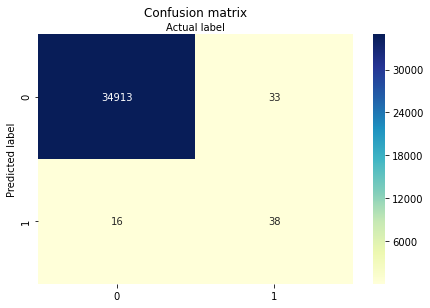

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

### We should go further and evaluate the model using model evaluation metrics such as accuracy, precision, and recall. These are calculated based on the confustion matrix:

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9986


### That is a fantastic accuracy score, isn't it?

In [17]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.7037037037037037
Recall: 0.5352112676056338
F1-score: 0.608


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34929
           1       0.70      0.54      0.61        71

    accuracy                           1.00     35000
   macro avg       0.85      0.77      0.80     35000
weighted avg       1.00      1.00      1.00     35000



### Although the accuracy is excellent, the model struggles with fraud detection and has not captured about 30 out of 71 fraudulent transactions.
### Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. That's where precision, recall and more specifically F1-score as their combinations becomes important:

- *Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial*

- *Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.*

- *In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.*

![](https://memegenerator.net/img/instances/80692979.jpg)